In [88]:
import pandas as pd

price_df = pd.read_csv('idealo_prices/idealo_scraper/perfume_sizes_prices.csv')

In [89]:
price_df.head()

,Unnamed: 0,unique_id,name,brand,year,collection,flakon_designer,perfumer,top_notes,middle_notes,...,Rauchig,Erdig,Animalisch,Fougère,Chypre,durability,sillage,bottle,scent,sizes_and_prices
0,0,1,Naxos,XerJoff,2015.0,1861,NaN,NaN,"['Lavendel', 'Bergamotte', 'Zitrone']","['Honig', 'Jasmin-Sambac', 'Kaschmir', 'Zimt']",...,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,[{'title': 'XerJoff XY 1861 Naxos Eau de Parfu...
1,1,2,Dior Homme Intense,Dior,2011.0,NaN,NaN,François Demachy,['florentinische Schwertlilie Absolue'],['ecuadorianischer Ambrettesamen'],...,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,[{'title': 'Dior Homme Intense Eau de Parfum (...
2,2,3,Layton,Parfums de Marly,2016.0,Masculine Signature Collection,NaN,Hamid Merati-Kashani,"['Apfel', 'Lavendel', 'Bergamotte', 'Mandarine']","['Jasmin', 'Rosengeranie', 'Veilchen']",...,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,[{'title': 'Parfums de Marly Layton Eau de Par...
3,3,4,Aventus,Creed,2010.0,NaN,NaN,Jean-Christophe Hérault,"['Bergamotte', 'Apfel', 'rosa Pfeffer', 'Schwa...","['Ananas', 'indonesisches Patchouli', 'Jasmin']",...,12.46,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,[{'title': 'Creed Aventus Eau de Parfum (100ml...
4,4,5,L'Homme,Prada,2016.0,NaN,NaN,Daniela Andrier,NaN,NaN,...,0.00,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,"[{'title': ""Prada L'Homme Eau de Toilette"", 'b..."


In [90]:
import pandas as pd
import ast
import numpy as np

def create_perfume_price_df(price_df):
    # Create an empty list to store the transformed data
    perfume_data = []
    
    # Iterate through the original dataframe
    for i, row in price_df.iterrows():
        brand = row['brand']
        name = row['name']
        
        # Initialize a dictionary for this perfume
        perfume_entry = {
            'brand': brand,
            'perfume_name': name
        }
        
        # Check if sizes_and_prices is NaN or None
        if pd.isna(row['sizes_and_prices']) or row['sizes_and_prices'] is None:
            # Skip this row or add it with empty price columns
            continue
        
        try:
            # Parse the sizes and prices string into a list of dictionaries
            sizes_and_prices = ast.literal_eval(row['sizes_and_prices'])
            
            # Track bottle sizes we've already seen for this perfume
            seen_bottle_sizes = set()
            
            # Extract bottle sizes and prices
            for element in sizes_and_prices:
                # Only process items with offers_count and bottle_size
                if element.get('offers_count') and element.get('bottle_size'):
                    bottle_size = element['bottle_size']
                    price = element['price']
                    
                    # Only add this bottle size if we haven't seen it before
                    if (bottle_size not in seen_bottle_sizes):
                        seen_bottle_sizes.add(bottle_size)
                        
                        # Create a column name based on bottle size (e.g., 'price_100ml')
                        column_name = f'price_{bottle_size.replace(" ", "")}'
                        perfume_entry[column_name] = price
            
            # Only add entries that have at least one bottle size
            if len(perfume_entry) > 2:  # More than just brand and perfume_name
                perfume_data.append(perfume_entry)
                
        except (ValueError, SyntaxError) as e:
            print(f"Error processing row {i} ({brand} - {name}): {e}")
            continue
    
    # Create the dataframe
    result_df = pd.DataFrame(perfume_data)
    
    return result_df

In [91]:
result_df = create_perfume_price_df(price_df)
result_df

,brand,perfume_name,price_100ml,price_50ml,price_150ml,price_125ml,price_75ml,price_200ml,price_30ml,price_10ml,...,price_230ml,price_385ml,price_625ml,price_320ml,price_480ml,price_68ml,price_330ml,price_235ml,price_355ml,price_57ml
0,XerJoff,Naxos,"167,90 €",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dior,Dior Homme Intense,"97,94 €","72,49 €","113,94 €",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Parfums de Marly,Layton,NaN,NaN,NaN,"219,95 €","188,99 €","359,99 €","115,00 €",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Creed,Aventus,"248,00 €","178,50 €",NaN,NaN,"260,10 €",NaN,"165,00 €",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Prada,L'Homme,"74,99 €","55,17 €","87,43 €",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9162,Louis Varel,Extreme Marine,"24,99 €",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9163,Pino Silvestre,Pino Silvestre Extreme,NaN,NaN,NaN,"10,12 €","8,70 €",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9164,Alfred Sung,Sung Spa,"19,99 €",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9165,Ella K Parfums,Lettre de Pushkar,"211,61 €",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
result_df.columns = result_df.columns.str.strip()

# Count non-NaN values per column
column_counts = result_df.notna().sum()

# Sort columns based on count of non-NaN values
sorted_columns = column_counts.sort_values(ascending=False).index

# Reorder DataFrame with sorted columns
df_sorted = result_df[sorted_columns]
print(df_sorted)

                 brand            perfume_name price_100ml price_50ml  \
0              XerJoff                   Naxos    167,90 €        NaN   
1                 Dior      Dior Homme Intense     97,94 €    72,49 €   
2     Parfums de Marly                  Layton         NaN        NaN   
3                Creed                 Aventus    248,00 €   178,50 €   
4                Prada                 L'Homme     74,99 €    55,17 €   
...                ...                     ...         ...        ...   
9162       Louis Varel          Extreme Marine     24,99 €        NaN   
9163    Pino Silvestre  Pino Silvestre Extreme         NaN        NaN   
9164       Alfred Sung                Sung Spa     19,99 €        NaN   
9165    Ella K Parfums       Lettre de Pushkar    211,61 €        NaN   
9166  Attar Collection                   Oasis     74,95 €        NaN   

     price_30ml price_75ml price_200ml price_125ml price_60ml price_90ml  ...  \
0           NaN        NaN         NaN    

In [65]:
# Function to clean and filter prices
def convert_price(price_series):
    return (
        price_series.astype(str)
        .str.replace("€", "", regex=False)
        .str.replace(".", "", regex=False)
        .str.replace(",", ".", regex=False)
        .str.strip()
        .astype(float)
    )

# Convert price columns
price_100ml = convert_price(result_df['price_100ml'].dropna())
price_50ml = convert_price(result_df['price_50ml'].dropna())
price_150ml = convert_price(result_df['price_150ml'].dropna())

# Drop outliers (assuming 3025.0 is the max outlier)
price_100ml = price_100ml[price_100ml < 3025.0]
price_50ml = price_50ml[price_50ml < 3025.0]
price_150ml = price_150ml[price_150ml < 3025.0]

In [66]:
max(price_100ml)

1187.06

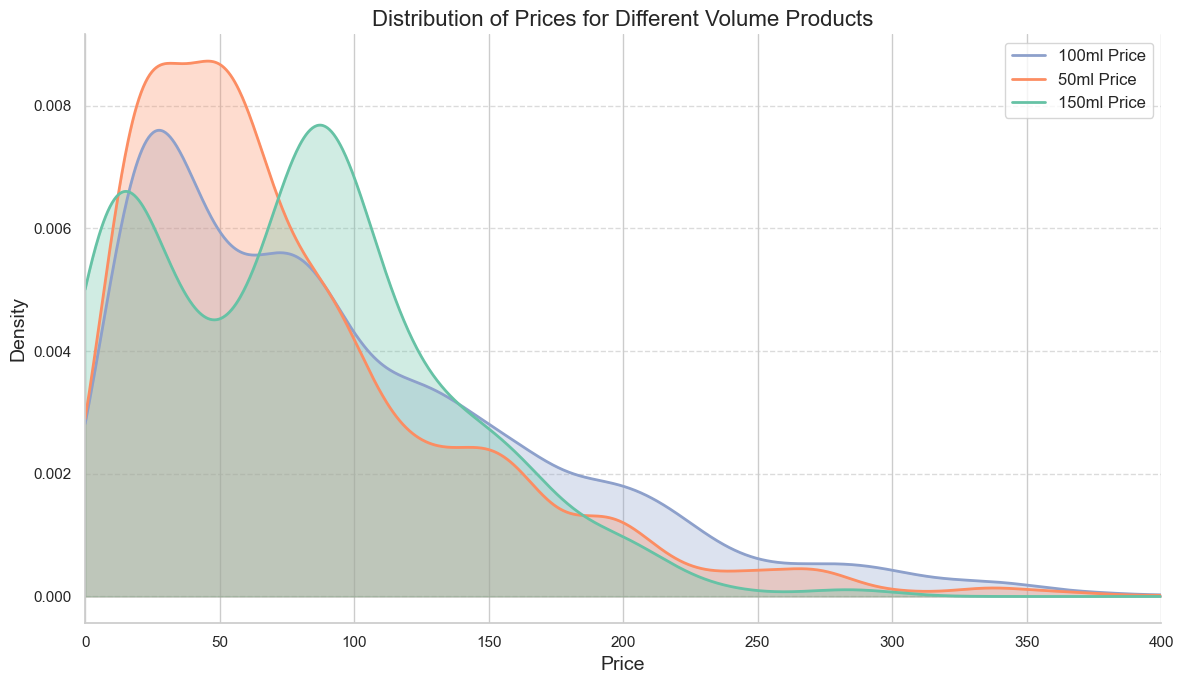

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# First, ensure the data is numeric
# Convert to numeric if needed, removing any non-numeric values
def convert_to_numeric(data):
    try:
        return pd.to_numeric(data, errors='coerce').dropna().values
    except:
        return np.array([float(x) for x in data if str(x).replace('.', '', 1).isdigit()])

# Convert the data
price_100ml_num = convert_to_numeric(price_100ml)
price_50ml_num = convert_to_numeric(price_50ml)
price_150ml_num = convert_to_numeric(price_150ml)

# Create the figure
plt.figure(figsize=(12, 7))

# Define the fixed x range (0 to 400)
x_min = 0
x_max = 400
x = np.linspace(x_min, x_max, 1000)

# Calculate density for each dataset
kde_100ml = stats.gaussian_kde(price_100ml_num)
kde_50ml = stats.gaussian_kde(price_50ml_num)
kde_150ml = stats.gaussian_kde(price_150ml_num)

# Plot the density curves
plt.plot(x, kde_100ml(x), color='#8da0cb', linewidth=2, label='100ml Price')
plt.fill_between(x, kde_100ml(x), alpha=0.3, color='#8da0cb')

plt.plot(x, kde_50ml(x), color='#fc8d62', linewidth=2, label='50ml Price')
plt.fill_between(x, kde_50ml(x), alpha=0.3, color='#fc8d62')

plt.plot(x, kde_150ml(x), color='#66c2a5', linewidth=2, label='150ml Price')
plt.fill_between(x, kde_150ml(x), alpha=0.3, color='#66c2a5')

# Set the x-axis limits explicitly
plt.xlim(x_min, x_max)

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels and title
plt.xlabel("Price", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.title("Distribution of Prices for Different Volume Products", fontsize=16)
plt.legend(fontsize=12)

# Remove top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Display the plot
plt.tight_layout()
plt.show()

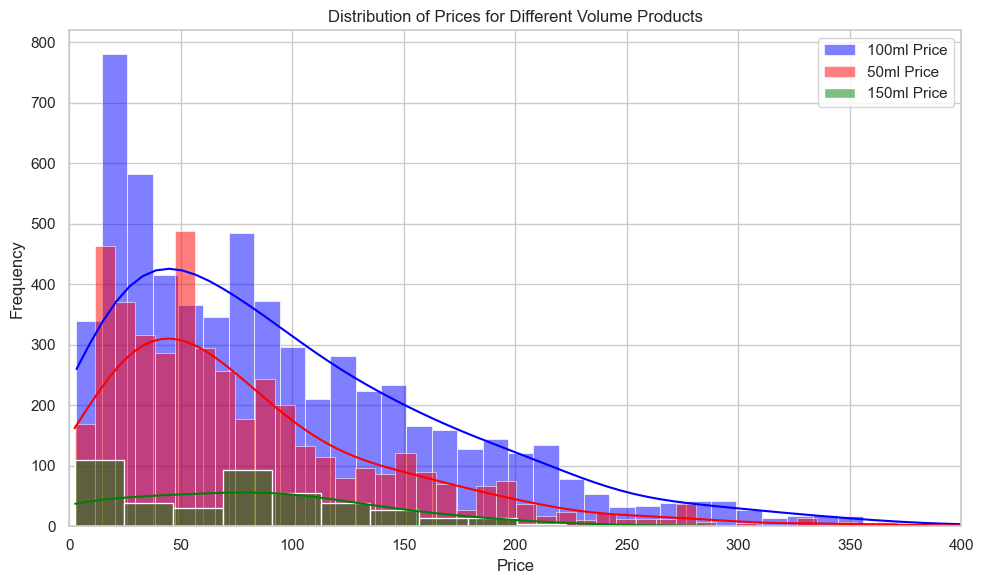

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setting the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Creating the figure and axis
plt.figure(figsize=(10, 6))

kde_kws={"bw_adjust": 2.0}
# Using alpha to make the histograms transparent so all are visible
sns.histplot(price_100ml, kde=True, color="blue", label="100ml Price", alpha=0.5, kde_kws=kde_kws)
sns.histplot(price_50ml, kde=True, color="red", label="50ml Price", alpha=0.5, kde_kws=kde_kws)
sns.histplot(price_150ml, kde=True, color="green", label="150ml Price", alpha=0.5, kde_kws=kde_kws)

# Adding labels and title
plt.xlabel("Price")
# Set the x-axis limits explicitly
plt.xlim(0, 400)
plt.ylabel("Frequency")
plt.title("Distribution of Prices for Different Volume Products")
plt.legend()

# Optional: Adjust the x-axis limit if needed
# plt.xlim(0, max_price_value)

# Show the plot
plt.tight_layout()
plt.show()

In [73]:
result_df.to_csv('idealo_prices.csv')